In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from scipy.constants import yocto

#Import data
CSV_FILE = 'static/df_non_temporal.csv'
df = pd.read_csv(CSV_FILE)
print(df.head())

   Unnamed: 0       id        date  mood_class  average_mood  \
0           0  AS14.01  2014-03-26           2      0.568421   
1           1  AS14.01  2014-03-27           2      0.631579   
2           2  AS14.01  2014-03-28           1      0.536842   
3           3  AS14.01  2014-03-29           5      0.789474   
4           4  AS14.01  2014-03-30           4      0.710526   

   last_5day_average_mood  last_5day_average_arousal  \
0                0.507181                   0.725131   
1                0.528725                   0.693717   
2                0.561041                   0.662304   
3                0.539497                   0.599476   
4                0.647217                   0.552356   

   last_5day_average_valence  last_5day_average_activity  \
0                   0.449915                    0.280123   
1                   0.490662                    0.265258   
2                   0.521222                    0.230133   
3                   0.500849          

In [4]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = df.iloc[:, np.arange(5,len(df.columns) - 1).tolist()]
t = df['average_mood']

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size = 0.2, random_state = 32)

#Initiate model
rf = RandomForestRegressor(n_estimators = 50, random_state = 32)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
MSE=mean_squared_error(y_test, y_pred)
print(MSE)

0.008307217003033905


In [1]:
#Feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()

NameError: name 'pd' is not defined

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

X = df.iloc[:, np.arange(5,len(df.columns) - 1).tolist()]
y = df['mood_class']
print(y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

#Initiate model
rf = RandomForestClassifier(n_estimators = 100, random_state = 32)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
confusion_hard = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[2 1 5 4 3]
              precision    recall  f1-score   support

           1       0.49      0.43      0.46        44
           2       0.51      0.60      0.55        75
           3       0.25      0.16      0.19        19
           4       0.23      0.21      0.22        39
           5       0.43      0.45      0.44        33

    accuracy                           0.43       210
   macro avg       0.38      0.37      0.37       210
weighted avg       0.42      0.43      0.42       210



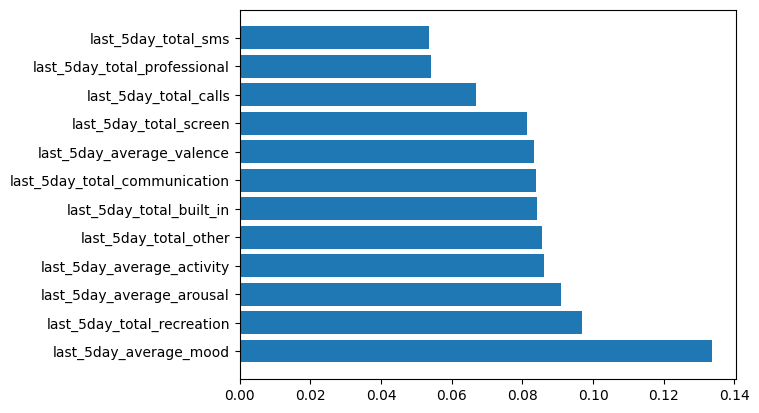

In [58]:
#Feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importance.index, feature_importance.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()